# <center> Projet 2 : Analysez des données de systèmes éducatifs

**Introduction** : 

Une start-up de la EdTech, qui propose du e-learning au public de niveau lycée et université, vise à faire un projet d'expansion à l'international en se basant sur un open source dataset de la banque mondiale.
Notre première mission du data scientist sera de réaliser une analyse exploratoire du jeu de données pour pouvoir prédire les pays avec un fort potentiel pour ce projet d'expansion. 

## 1. Importation des modules 

La première chose que nous devrons faire est de charger les bibliothèques et les jeu de données que nous utiliserons.

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.colors

#inclure les graphes plt dans le nootbook en utilisant le backend "inline"
%matplotlib inline 

## 2. Importation des données

In [3]:
dataset1 = pd.read_csv("C:\\Users\Marwa\Downloads\OCR_Projet2_datasets\EdStatsCountry.csv")
dataset2 = pd.read_csv("C:\\Users\Marwa\Downloads\OCR_Projet2_datasets\EdStatsCountry-Series.csv")
dataset3 = pd.read_csv("C:\\Users\Marwa\Downloads\OCR_Projet2_datasets\EdStatsData.csv")
dataset4 = pd.read_csv("C:\\Users\Marwa\Downloads\OCR_Projet2_datasets\EdStatsFootNote.csv")
dataset5 = pd.read_csv("C:\\Users\Marwa\Downloads\OCR_Projet2_datasets\EdStatsSeries.csv")

In [4]:
#Créer des copies à nettoyer
dataset1_copy=dataset1.copy()
dataset2_copy=dataset2.copy()
dataset3_copy=dataset3.copy()
dataset3_filter_year=dataset3.copy()
dataset4_copy=dataset4.copy()
dataset5_copy=dataset5.copy()

In [5]:
#définir des fonctions

#fonction qui normalise les noms de colonnes
def normalize_columns_names(name):
    import re
    # convert CamelCase to snake_case
    name = re.sub('(.)([A-Z][a-z]+)', r'\1_\2', name)
    name = re.sub('([a-z0-9])([A-Z])', r'\1_\2', name)
    
    name = name.replace(" ", "_") # replace whitespace by underscore
    name = re.sub('_+', '_', name) # delete multiple underscore
    
    name = name.lower() # format to lowercase
    
    return name

for dataset in (dataset1_copy, dataset2_copy, dataset3_copy, dataset4_copy, dataset5_copy, dataset3_filter_year):
    dataset.rename(columns=normalize_columns_names, inplace=True)


# pivot dataframe to tidy format
dataset3_copy = (dataset3_copy
           .melt(id_vars=["country_name", "country_code", "indicator_name", "indicator_code"]) 
           .rename(columns={
               "variable": "year",
               "value": "indicator_value"
           })
          )

## 3. Description des données

### 3.1. Forme

Dans ce paragraphe, je vais répondre à la *deuxième* question : 
- Décrire les informations contenues dans le jeu de données(nombre de colonnes ? nombre de lignes ?)

In [6]:
dataset1_copy.name='EdStatsCountry'
dataset2_copy.name='EdStatsCountry-Series'
dataset3_copy.name='EdStatsData'
dataset4_copy.name='EdStatsFootNote'
dataset5_copy.name='EdStatsSeries'

In [7]:
for dataset_copy in [dataset1_copy, dataset2_copy, dataset3_copy, dataset4_copy, dataset5_copy]:
    print(dataset_copy.name, ':', dataset_copy.shape)

EdStatsCountry : (241, 32)
EdStatsCountry-Series : (613, 4)
EdStatsData : (58537380, 6)
EdStatsFootNote : (643638, 5)
EdStatsSeries : (3665, 21)


### 3.2. Qualité

Dans ce paragraphe, je vais répondre à la *première* question :
- Valider la qualité de ce jeu de données (comporte-t-il beaucoup de données manquantes, dupliquées ?)

La première chose à faire avec un jeu de données est d'en jeter un coup d'œil. Cela permet de voir que tout est lu correctement et donne une idée de ce qui se passe avec les données.

In [8]:
#afficher les 5 prémières lignes du dataset
dataset1_copy.head() 

,country_code,short_name,table_name,long_name,2-alpha_code,currency_unit,special_notes,region,income_group,wb-2_code,...,imf_data_dissemination_standard,latest_population_census,latest_household_survey,source_of_most_recent_income_and_expenditure_data,vital_registration_complete,latest_agricultural_census,latest_industrial_data,latest_trade_data,latest_water_withdrawal_data,unnamed:_31
0,ABW,Aruba,Aruba,Aruba,AW,Aruban florin,SNA data for 2000-2011 are updated from offici...,Latin America & Caribbean,High income: nonOECD,AW,...,NaN,2010,NaN,NaN,Yes,NaN,NaN,2012.0,NaN,NaN
1,AFG,Afghanistan,Afghanistan,Islamic State of Afghanistan,AF,Afghan afghani,Fiscal year end: March 20; reporting period fo...,South Asia,Low income,AF,...,General Data Dissemination System (GDDS),1979,"Multiple Indicator Cluster Survey (MICS), 2010/11","Integrated household survey (IHS), 2008",NaN,2013/14,NaN,2012.0,2000,NaN
2,AGO,Angola,Angola,People's Republic of Angola,AO,Angolan kwanza,"April 2013 database update: Based on IMF data,...",Sub-Saharan Africa,Upper middle income,AO,...,General Data Dissemination System (GDDS),1970,"Malaria Indicator Survey (MIS), 2011","Integrated household survey (IHS), 2008",NaN,2015,NaN,NaN,2005,NaN
3,ALB,Albania,Albania,Republic of Albania,AL,Albanian lek,NaN,Europe & Central Asia,Upper middle income,AL,...,General Data Dissemination System (GDDS),2011,"Demographic and Health Survey (DHS), 2008/09",Living Standards Measurement Study Survey (LSM...,Yes,2012,2010.0,2012.0,2006,NaN
4,AND,Andorra,Andorra,Principality of Andorra,AD,Euro,NaN,Europe & Central Asia,High income: nonOECD,AD,...,NaN,2011. Population figures compiled from adminis...,NaN,NaN,Yes,NaN,NaN,2006.0,NaN,NaN


In [9]:
#afficher une description statistique de la colonne "country_name"
dataset1_copy.describe() 

,national_accounts_reference_year,latest_industrial_data,latest_trade_data,unnamed:_31
count,32.00000,107.000000,185.000000,0.0
mean,2001.53125,2008.102804,2010.994595,NaN
std,5.24856,2.616834,2.569675,NaN
min,1987.00000,2000.000000,1995.000000,NaN
25%,1996.75000,2007.500000,2011.000000,NaN
50%,2002.00000,2009.000000,2012.000000,NaN
75%,2005.00000,2010.000000,2012.000000,NaN
max,2012.00000,2010.000000,2012.000000,NaN


#### Données manquantes

Les données manquantes sont répresentées généralement par NaN ou None.

In [10]:
#obtenir les données manquantes
dataset1_copy.isna()

,country_code,short_name,table_name,long_name,2-alpha_code,currency_unit,special_notes,region,income_group,wb-2_code,...,imf_data_dissemination_standard,latest_population_census,latest_household_survey,source_of_most_recent_income_and_expenditure_data,vital_registration_complete,latest_agricultural_census,latest_industrial_data,latest_trade_data,latest_water_withdrawal_data,unnamed:_31
0,False,False,False,False,False,False,False,False,False,False,...,True,False,True,True,False,True,True,False,True,True
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,True,False,True,False,False,True
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,True,False,True,True,False,True
3,False,False,False,False,False,False,True,False,False,False,...,False,False,False,False,False,False,False,False,False,True
4,False,False,False,False,False,False,True,False,False,False,...,True,False,True,True,False,True,True,False,True,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
236,False,False,False,False,True,False,False,False,False,False,...,False,False,True,False,True,True,True,True,True,True
237,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,True,True,False,False,False,True
238,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,True,False,False,False,False,True
239,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,True,False,True,False,False,True


Il semble qu'il y a beaucoup des données manquantes ! 
Il pourrait être utile de voir quel pourcentage des valeurs de notre jeu de données manquait pour nous donner une meilleure idée de l'ampleur de ce problème :

In [11]:
#obtenir le nombre de données manquantes
missing_values=dataset1_copy.isna().sum()
missing_values_column=dataset1_copy.isna().sum() 
total_cells = np.product(dataset1_copy.shape)
total_missing = missing_values.sum()
percent_missing = (total_missing/total_cells) * 100
print(percent_missing)

30.52385892116183


- Près de 30% des cellules de dataset1 sont vides !
- Près de 25% des cellules de dataset2 sont vides !
- Près de 90% des cellules de dataset3 sont vides !
- Un pourcentage de 20% des cellules de dataset4 sont vides !
- Près de 70% des cellules de dataset5 sont vides !
- Dans l'étape suivante, nous allons examiner de plus près certaines des colonnes avec des valeurs manquantes et essayer de comprendre ce qui pourrait se passer avec elles.

#### Données dupliquées

In [12]:
#afficher le nombre des lignes duplicated
dataset1_copy.duplicated().sum() 

0

## Bilan de description 

Après une phase d'observation de jeu des données, on a eu une description globale des datasets.
#### Dataset1

Le dataset contient des informations globales sur la socio-économie de chaque pays et région. 

Granularité: Une ligne par pays

Clé: Country Code

241 lignes donc 241 pays
Par contre, la colonne 'short_name' contient non seulement des noms de pays mais aussi une liste des 33 régions qui est la suivante :
         'Arab World',
         'East Asia & Pacific',
         'East Asia & Pacific (excluding high income)',
         'East Asia & Pacific (developing only)',
         'East Asia & Pacific (all income levels)',
         'Euro area',
         'European Union'
         'Europe & Centraµl Asia',
         'Europe & Central Asia (excluding high income)',
         'Europe & Central Asia (developing only)',
         'Europe & Central Asia (all income levels)',
         'European Union',
         'Heavily indebted poor countries (HIPC)',
         'High income',
         'Latin America & Caribbean',
         'Latin America & Caribbean (developing only)',
         'Latin America & Caribbean (excluding high income)',
         'Least developed countries: UN classification',
         'Low & middle income',
         'Low income',
         'Lower middle income',
         'Middle East & North Africa',
         'Middle East & North Africa (excluding high income)',
         'Middle East & North Africa (all income levels)',
         'Middle East & North Africa (developing only)',
         'Middle income',
         'North America',
         'OECD members',
         'South Asia',
         'Sub-Saharan Africa',
         'Sub-Saharan Africa (excluding high income)',
         'Upper middle income',
         'World' 
- Données dupliquées : aucun doublon
- Données manquantes : 28.28%

#### Dataset2

Information additionnelle à Dataset1

Granularité: Une ligne par pays et par series

Clé: CountryCode x SeriesCode

Dataset2 donne des indications sur les sources des données de divers couples Indicateur/Pays.

- Données dupliquées : aucun doublon
- Données manquantes : 25%

#### Dataset3

Dataset principal, contient des indicateurs pour chaque pays à la granularité temporelle

Granulaité: Pays x Indicateur x Année

Clé: Country Code x Indicator Code x Year

Le dataset3 est composée des combinaisons des entrées uniques des colonnes "country_code" et "indicator_code" (respectivement 242 et 3665 entrées uniques). Le reste des colonnes détaillent les valeurs pour chaque année de 1970 à 2100.

- Données dupliquées : aucun doublon
- Données manquantes : 86.09%

#### Dataset4

Dataset donnant l'information de la provenance de chaque series chaque année (estimation, données du pays, ...).

Information additionnelle à Dataset2

Granularité: Pays x Series x Année

- Données dupliquées : aucun doublon
- Données manquantes : 20%

#### Dataset5

Dataset donnant les caractéristiques de chaque series.

Granularité: Series

- Données dupliquées : aucun doublon
- Données manquantes : 71.72%

NB : Dataset2 et Dataset4 sont des métadonnées (data description) sur les datasets 1, 3 et 5.

In [13]:
#des colonnes "Unnamed: " qui sont vides en intégralité et peut donc être supprimées sans perte d'information
#supprimer les colonnes vides
dataset1_copy.drop(['unnamed:_31'],axis=1,inplace=True)
dataset2_copy.drop(['unnamed:_3'],axis=1,inplace=True)
dataset4_copy.drop(['unnamed:_4'],axis=1,inplace=True)

#data_cleaning
dataset1_copy.dropna(axis=0,how='all',inplace=True)
dataset2_copy.dropna(axis=0,how='all',inplace=True)
dataset3_copy.dropna(axis=0,how='all',inplace=True)
dataset4_copy.dropna(axis=0,how='all',inplace=True)

### 3.3. Jointure 

#### Jointure entre dataset1 et dataset2

Le dataset1 et le dataset2 présentent une colonne en commun 'country_code'.
La jointure se fera selon la granularité: le dataset plus fin vers le dataset le moins fin.

In [14]:
x= dataset1_copy['country_code']
len(x)
y= dataset2_copy['country_code']
len(y)
print(len(x),len(y),len(set(x)&set(y))) 
#len(set(x)&set(y))) savoir l'intersection entre x et y (transforme l'ensemble x et y)

241 613 211


In [15]:
left_join_1_2 = pd.merge(dataset1_copy, dataset2_copy, on = "country_code", how= 'left')

#vérifier le type de data si c'est une dataframe ou pas
type(left_join_1_2)

#Enregistrer left_join_1_2 comme fichier csv
#left_join_1_2.to_csv("C:\\Users\Marwa\Downloads\OCR_Projet2_datasets\jointure_1_2.csv")

pandas.core.frame.DataFrame

#### Jointure entre dataset3 et dataset4 

Après exploration des données, j'ai trouvé une colonne en commun entre dataset3 ('indicator_code') et dataset4 ('series_code').
Cette étape n'a pas abouti à un résultat vu qu'il y avait un 'Memory error' à chaque fois.

Toutesfois, dans l'enoncé du projet, ils ont demandé de remettre un notebook non-cleané pour comprendre la démarche de l'analyse exploratoire.

In [16]:
x= dataset3_copy['indicator_code']
len(x)
y= dataset4_copy['series_code']
len(y)
print(len(x),len(y),len(set(x)&set(y))) 
#len(set(x)&set(y))) savoir l'intersection entre x et y (transforme l'ensemble x et y)

58537380 643638 1469


In [17]:
#Pour pouvoir faire la jointure, il faut renomer la colonne 'series_code' dans dataset4_copy par 'indicator_code' 
dataset4_copy.rename({'series_code':"indicator_code"},axis=1,inplace=True) 

#jointure entre dataset4 et dataset3
#left_join = pd.merge(dataset4_copy, dataset3_copy, on = 'indicator_code', how= 'left')

#jointure entre dataset3 et dataset4
#jointure_3_4 = dataset3_copy.set_index('indicator_code').join(dataset4_copy.set_index("indicator_code"))


In [18]:
#taille de la colonne en Mo
dataset4_copy['indicator_code'].memory_usage(deep=True)/1e6 
dataset3_copy['indicator_code'].memory_usage(deep=True)/1e6

4829.357808

Pandas utilise le dtype "object" pour stocker divers types de types de données, mais le plus souvent, lorsque nous voyons une colonne avec le dtype "object", elle contient des str.
Pour minimiser la consommation en mémoire, on changera le type des variables 'object' en variable catégorielle.

In [19]:
#changer le type des variables 'object' en variable catégorielle pour minimiser en consommation mémoire.
colonne_dt3=['country_name', "country_code", "indicator_name", 'indicator_code','year']
for x in colonne_dt3:
    dataset3_copy[x] = pd.Categorical(dataset3_copy[x])
    
colonne_dt4=["country_code",'indicator_code','year','description']
for x in colonne_dt4:
    dataset4_copy[x] = pd.Categorical(dataset4_copy[x])

J'ai eu encore le message d'erreur suivant:
 - MemoryError: Unable to allocate 19.7 GiB for an array with shape (10244011821,) and data type int64

Après plusieurs tentatives, j'ai abondonné la jointure entre le dataset3 et le dataset4.
J'ai laissé quand méme la démarche, vu que je dois impérativement présenté un notebook non-cleané.

#### Jointure entre dataset1, dataset2 et dataset3

In [20]:
jointure_1_2 = pd.read_csv("C:\\Users\Marwa\Downloads\OCR_Projet2_datasets\jointure_1_2.csv")

In [21]:
#créer une nouvelle dataframe à partir du dataset en choisisant que les colonnes avec des données pertinantes pour notre analyse.
df_dataset3_copy=pd.DataFrame({"country_code": dataset3_copy["country_code"], "country_name": dataset3_copy["country_name"],
                         "indicator_name": dataset3_copy["indicator_name"], "indicator_code": dataset3_copy["indicator_code"],
                         "year": dataset3_copy["year"]})

df_dataset_1_2=pd.DataFrame({"country_code": jointure_1_2["country_code"], "region":jointure_1_2["region"],
                            'income_group':jointure_1_2['income_group']})

In [22]:
df_dataset1_2_3=pd.merge(df_dataset_1_2,df_dataset3_copy, left_on='country_code', right_on='country_code')

In [23]:
#Créer des copies à nettoyer
#dataset1_2_3_copy=dataset1_2_3.copy()
df_dataset1_2_3_copy=df_dataset1_2_3.copy()

# 3. Analyse des données

Dans cette partie, on répondra à la troisième question : Sélectionner les informations qui semblent pertinentes pour répondre à la problématique (quelles sont les colonnes contenant des informations qui peuvent être utiles pour répondre à la problématique de l’entreprise ?)

## 3.1 Visualisation des données

### Graphe 1 : Nombre de Pays par Région

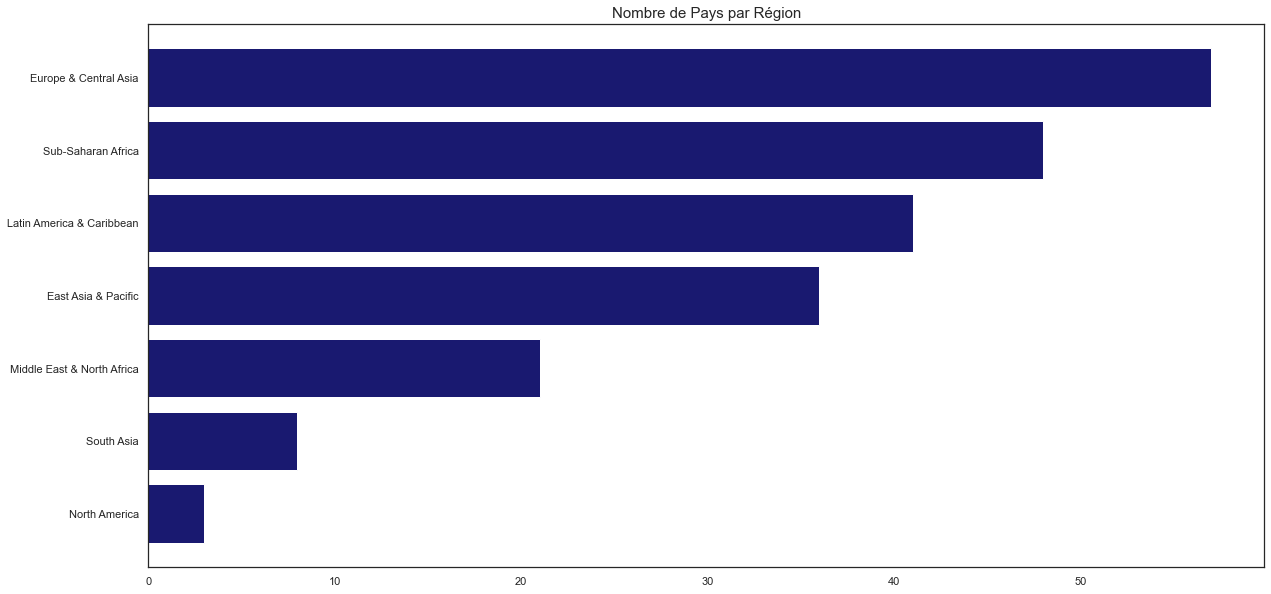

In [24]:
#Nombre de Pays par Région
sns.set(style="white")
plt.figure(figsize=(20, 10))
plt.title('Nombre de Pays par Région', size=15)
plt.barh(y = dataset1_copy.groupby('region')[['short_name']].count().reset_index().sort_values(by='short_name')['region'], width = dataset1_copy.groupby('region')[['short_name']].count()['short_name'].sort_values(), color="midnightblue")

plt.show()

### Graphe 2 : Nombre de pays par 'Income_group'  

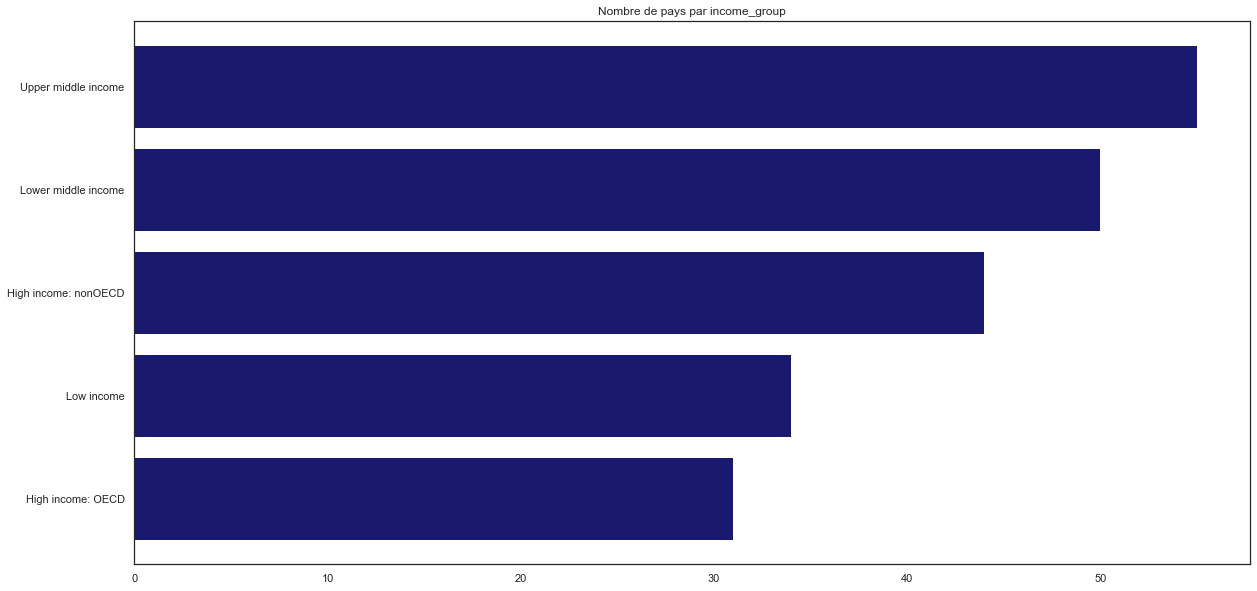

In [25]:
#'income_group' en fonction du nombre des pays
sns.set(style="white")
plt.figure(figsize=(20,10))
plt.barh(y = dataset1_copy.groupby('income_group')[['short_name']].count().reset_index().sort_values(by='short_name')['income_group'], width = dataset1_copy.groupby('income_group')[['short_name']].count()['short_name'].sort_values(), color='midnightblue')
plt.title('Nombre de pays par income_group')

plt.show()

### Graphe 3 : Nombre de données par an

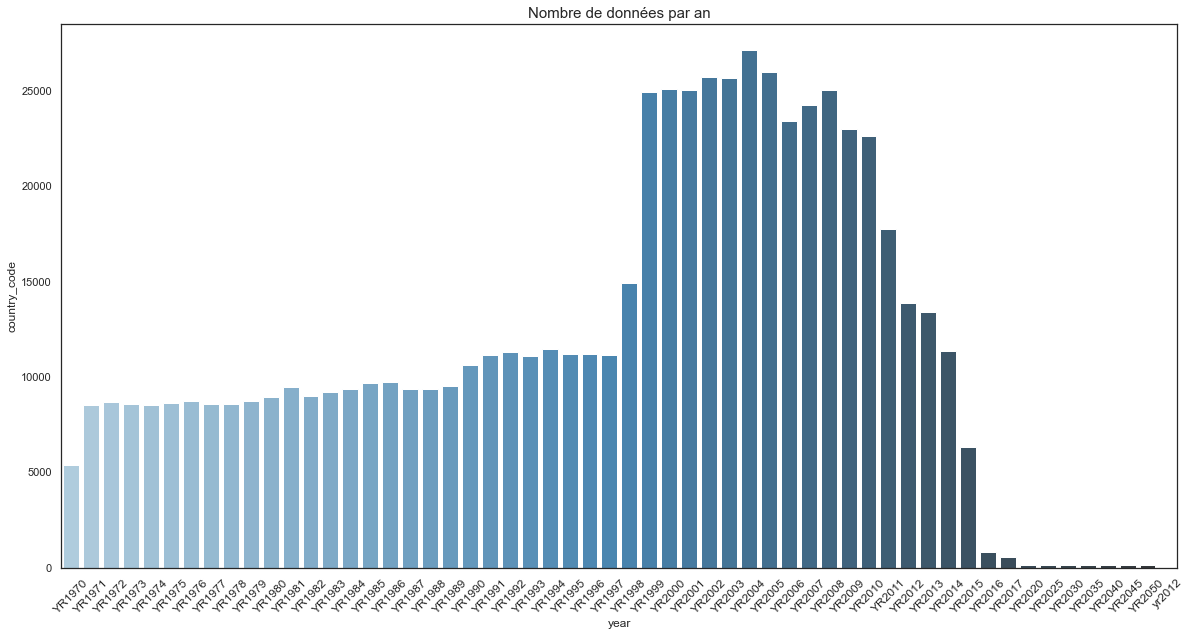

In [26]:
#country_code par year
sns.set(style="white")
plt.figure(figsize=(20, 10))
plt.title('Nombre de données par an', size=15)
plot = sns.barplot(y = 'country_code', x='year', data = dataset4_copy.groupby('year').count().reset_index(), palette="Blues_d")
plot.set_xticklabels(labels = dataset4_copy.groupby('year').count().reset_index()['year'], rotation=45, size=12)

plt.show()

### Graphe 4 : Nombre d'indicateurs par pays (dataset4)

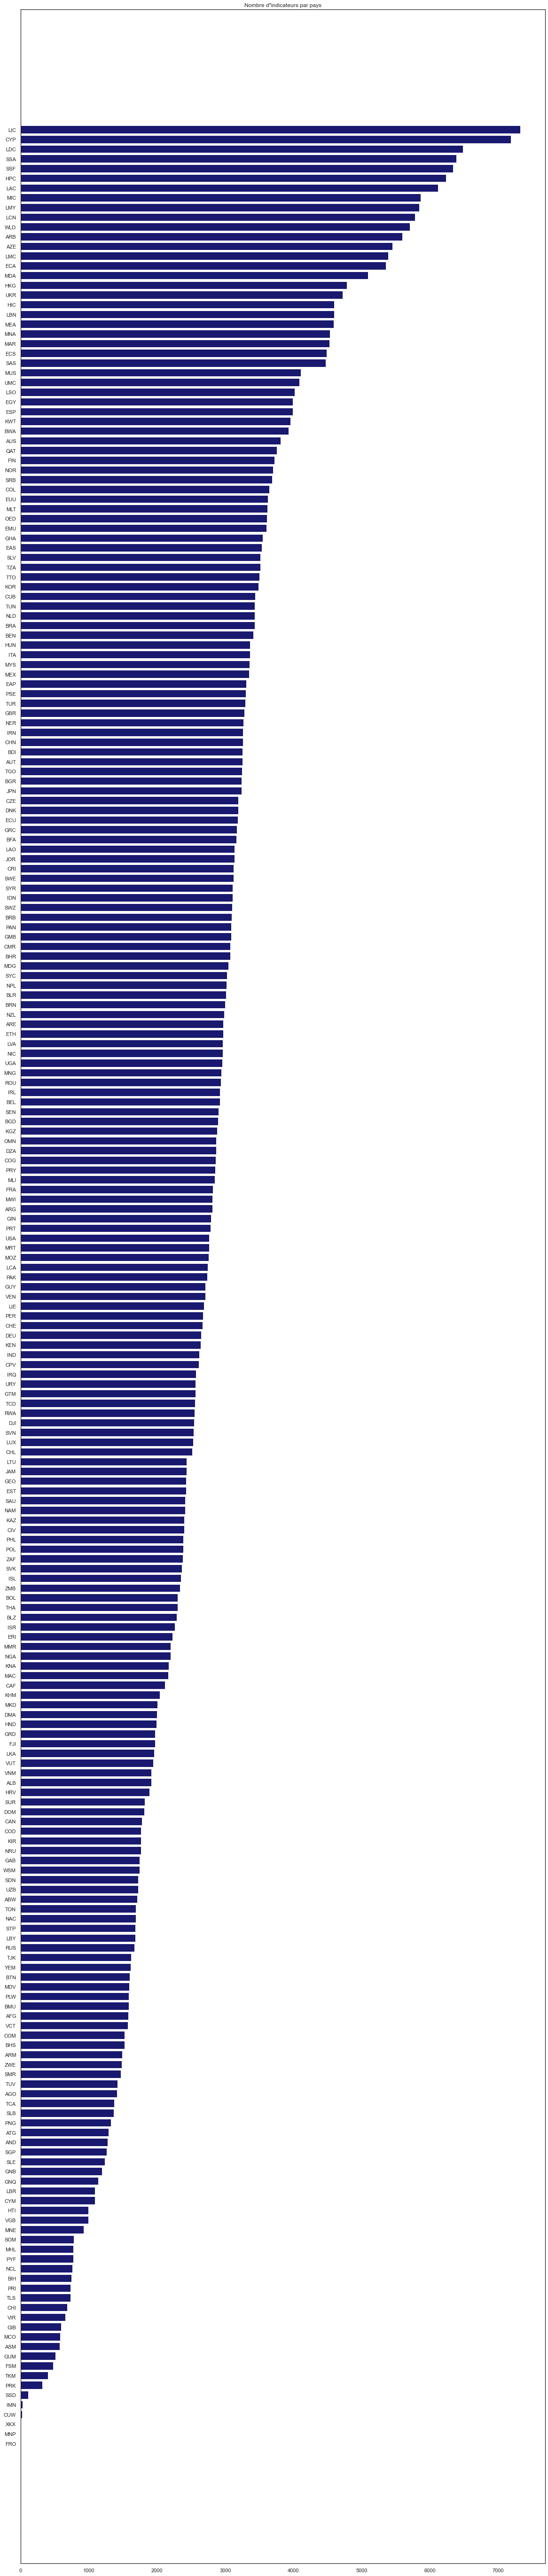

In [27]:
#'indicator_code'en fonction des pays
sns.set(style="white")
plt.figure(figsize=(20, 100))
plt.barh(y = dataset4_copy.groupby('country_code')[['indicator_code']].count().reset_index().sort_values(by='indicator_code')['country_code'], width = dataset4_copy.groupby('country_code')[['indicator_code']].count()['indicator_code'].sort_values(), color='midnightblue')
plt.title('Nombre d"indicateurs par pays')

plt.show()

### Graphe 5 : Nombre d'indicateurs par Région

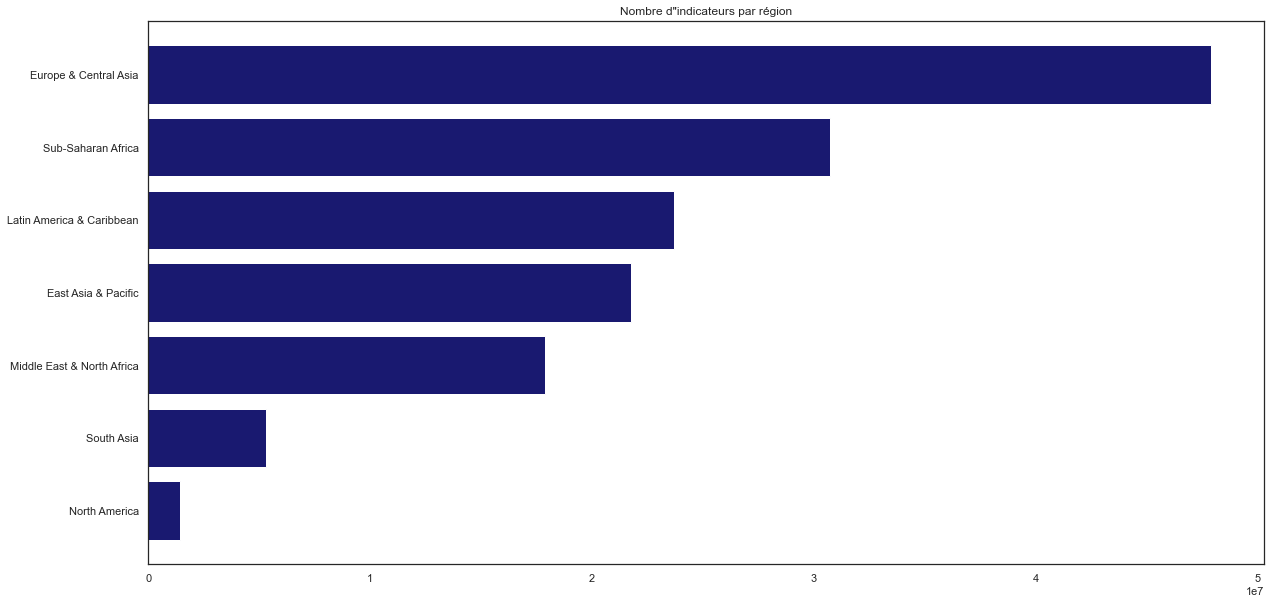

In [28]:
#'indicator_code'en fonction des régions
sns.set(style="white")
plt.figure(figsize=(20,10))
#plt.barh(y = df_dataset1_2_3_copy.groupby('region')[['year']].count().reset_index().sort_values(by='year')['region'], width = df_dataset1_2_3_copy.groupby('region')[['year']].count()['year'].sort_values(), color='midnightblue')
#plt.barh(y = df_dataset1_2_3_copy.groupby('region')[['indicator_name']].count().reset_index().sort_values(by='indicator_name')['region'], width = df_dataset1_2_3_copy.groupby('region')[['indicator_name']].count()['indicator_name'].sort_values(), color='midnightblue')
plt.barh(y = df_dataset1_2_3_copy.groupby('region')[['indicator_code']].count().reset_index().sort_values(by='indicator_code')['region'], width = df_dataset1_2_3_copy.groupby('region')[['indicator_code']].count()['indicator_code'].sort_values(), color='midnightblue')
plt.title('Nombre d"indicateurs par région')

plt.show()

#'indicator_code', 'indicator_name' et 'year' donnent le méme graphe

#### Pré-sélection:

- D'après les graphes ci-dessus, on peut procéder au nettoyage des données en appliquant les filtres suivants:
 - Le graphe 3 montre bien que les années qui contiennet les plus des données, c'est l'intervalle [1999, 2015]. On va se baser sur cet intervalle pour la suite de nos analyses.
 - On va filter les pays selon le critère (income_group), on éliminera les pays à faibles revenus.On gardera les pays avec : High income: nonOECD, Upper middle income et High income: OECD.
 - Le graphe 1 et graphe 5 n'apportent pas des informations utiles à la problématique. 

Nous avons 3665 indicateurs uniques, comment peut-on filtrer les indicateurs ?

In [29]:
##filter le dataset selon l'indicateur income_group
incomes = ['Upper middle income', 'High income: nonOECD', 'High income: OECD']
pays_incomes = df_dataset1_2_3[df_dataset1_2_3.income_group.isin(incomes)]

In [30]:
#filter le dataset selon l'indicateur le taux de remplissage des colonnes années
dataset3_filter_year.drop(['1970', '1971', '1972', '1973', '1974', '1975', '1976', '1977', '1978','1979', '1980', '1981', '1982', '1983', '1984', '1985', '1986', '1987','1988', '1989', '1990', '1991', '1992', '1993', '1994', '1995', '1996','1997', '1998', '2016',
       '2017', '2020', '2025', '2030', '2035', '2040', '2045', '2050', '2055',
       '2060', '2065', '2070', '2075', '2080', '2085', '2090', '2095', '2100', 'unnamed:_69'], axis=1, inplace=True)

## 3.2. Selection des indicateurs

In [31]:
#afficher les éléments uniques de la colonne 'indicator_name'
df_dataset1_2_3["indicator_name"].unique().tolist()

['Adjusted net enrolment rate, lower secondary, both sexes (%)',
 'Adjusted net enrolment rate, lower secondary, female (%)',
 'Adjusted net enrolment rate, lower secondary, gender parity index (GPI)',
 'Adjusted net enrolment rate, lower secondary, male (%)',
 'Adjusted net enrolment rate, primary, both sexes (%)',
 'Adjusted net enrolment rate, primary, female (%)',
 'Adjusted net enrolment rate, primary, gender parity index (GPI)',
 'Adjusted net enrolment rate, primary, male (%)',
 'Adjusted net enrolment rate, upper secondary, both sexes (%)',
 'Adjusted net enrolment rate, upper secondary, female (%)',
 'Adjusted net enrolment rate, upper secondary, gender parity index (GPI)',
 'Adjusted net enrolment rate, upper secondary, male (%)',
 'Adjusted net intake rate to Grade 1 of primary education, both sexes (%)',
 'Adjusted net intake rate to Grade 1 of primary education, female (%)',
 'Adjusted net intake rate to Grade 1 of primary education, gender parity index (GPI)',
 'Adjusted 

In [32]:
#Afficher les indicateurs avec les plus des données en 2015
dataset3_filter_year[['indicator_name', '2015']].groupby('indicator_name').count().sort_values(by='2015',ascending=False)

,2015
indicator_name,
Population growth (annual %),232
"Population, total",232
Internet users (per 100 people),223
GDP at market prices (current US$),218
"Population, ages 15-64 (% of total)",218
...,...
EGRA: Oral Reading Fluency - Correct Words Read Per Minute (Mean). Somaligna. 3rd Grade,0
EGRA: Oral Reading Fluency - Correct Words Read Per Minute (Mean). Songhoi. 2nd Grade,0
EGRA: Oral Reading Fluency - Correct Words Read Per Minute (Mean). Spanish. 2nd Grade,0


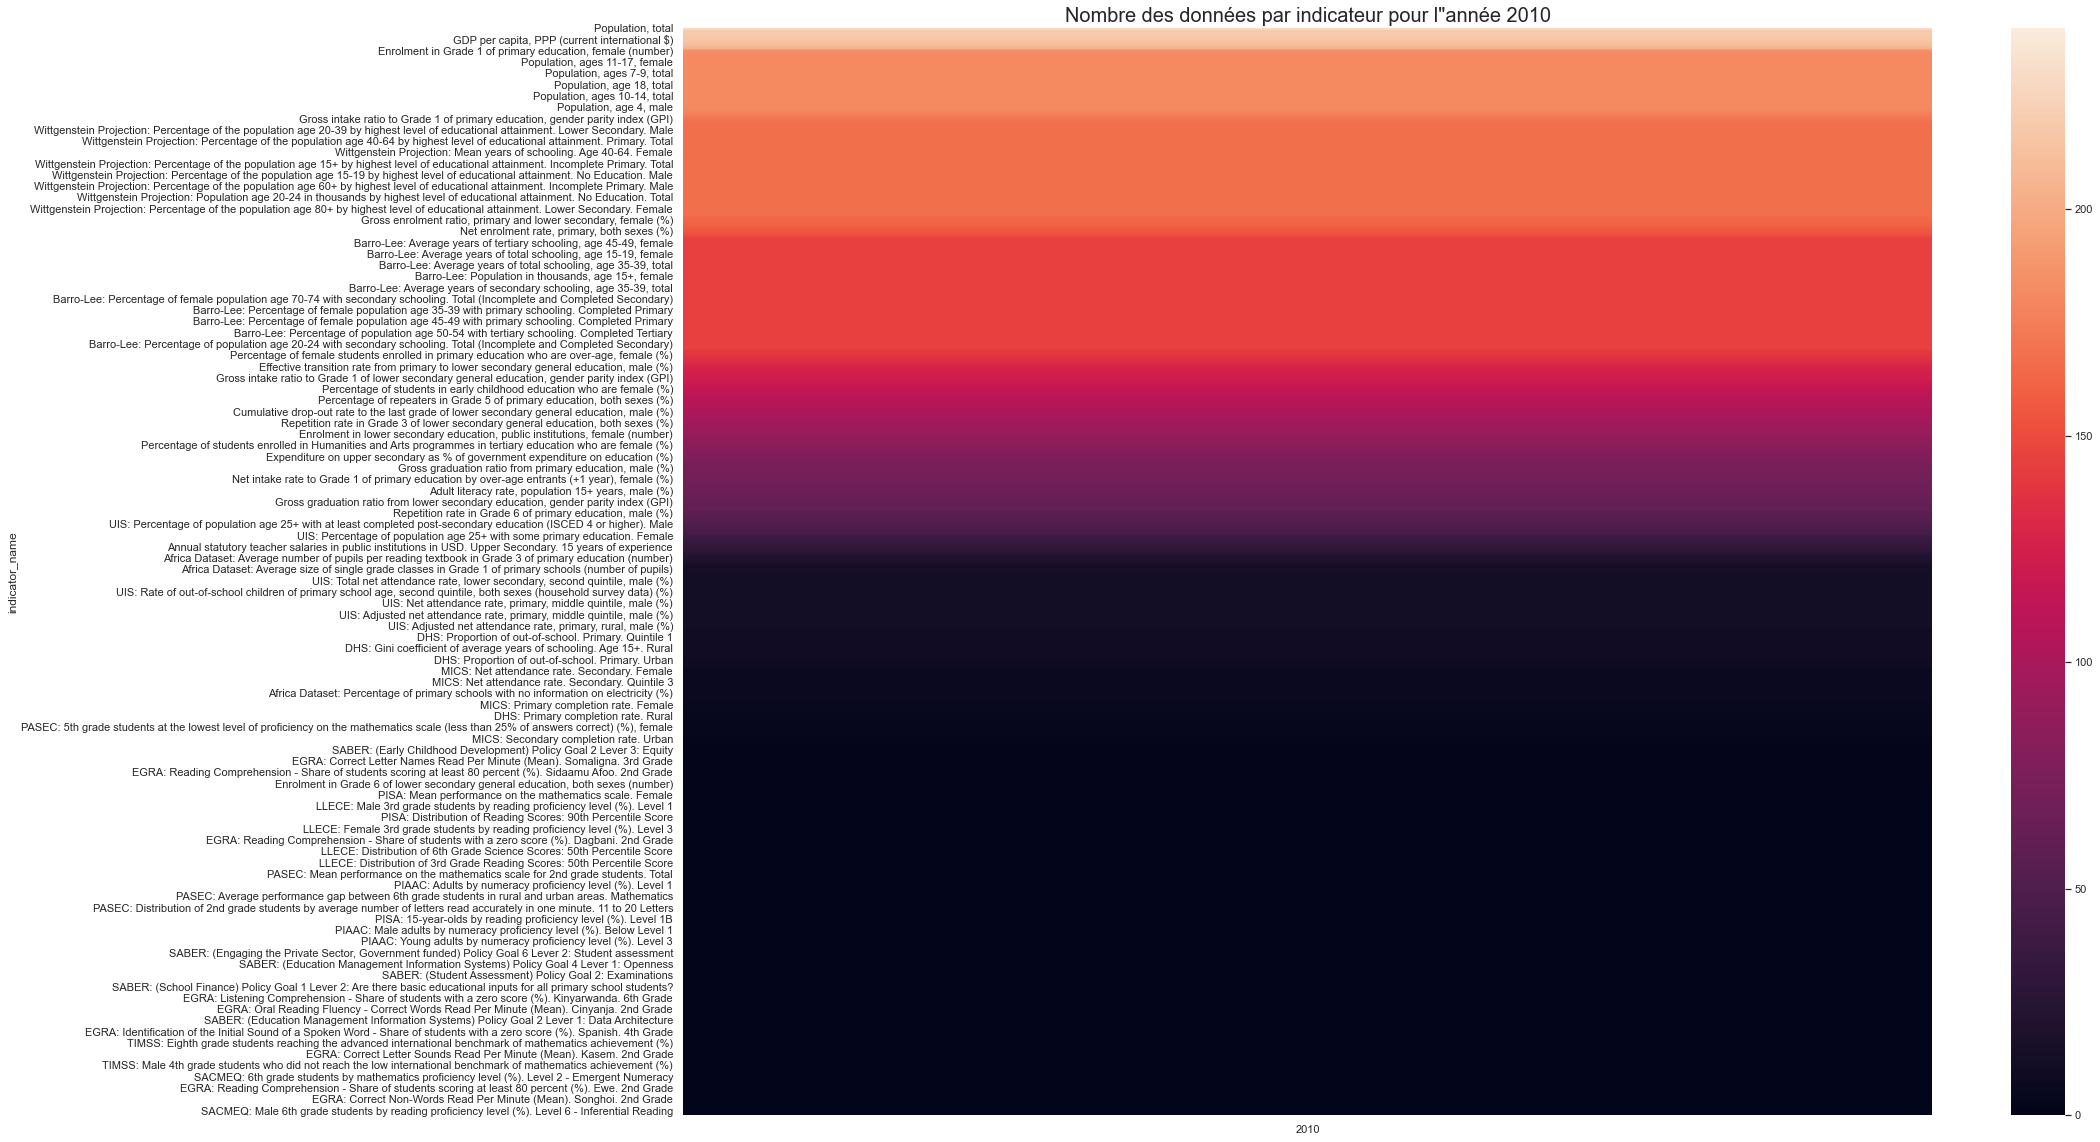

In [33]:
#Nombre de données par indicateur pour 2010
sns.set(style="white")
plt.figure(figsize=(28,20))
plt.xlabel('Nombre de données par indicateur', size=20)
sns.heatmap(dataset3_filter_year[['indicator_name', '2010']].groupby('indicator_name').count().sort_values(by='2010',ascending=False))
plt.title('Nombre des données par indicateur pour l"année 2010', size=20 )

plt.show()

D'après les graphe ci-dessus, nous avons beaucoup trop des données. On va donc appliquer les filtres suivants :

  - On gardera que les pays avec un nombre de lycéens et étudiants important.
  - On gardera que les pays déservi par internet
  - On gardera que les pays avec un niveau de vie haut et moyen selon le produit intérieur brut PIB
  - On gardera que la tranche d'age 15-24.    

## Indicateur 1 : Education

Les indicateurs identifiés pour le nombre potentiel des lycéens et étudiants sont les suivants :

- Enrolment in lower secondary general, both sexes (number) UIS.E.2.GPV (NA=21.44%)	
- Enrolment in lower secondary education, both sexes (number)	UIS.E.2 (NA=22.74%)
- Enrolment in lower secondary education, public institutions, both sexes (number) UIS.E.2.PU (NA=38.82%)

- Enrolment in secondary general, both sexes (number)	SE.SEC.ENRL.GC (NA=19.30%)
- Enrolment in secondary education, both sexes (number) SE.SEC.ENRL (NA=23.00%)
- Enrolment in secondary education, private institutions, both sexes (number)	UIS.E.23.PR (NA=36.73%)
- Enrolment in secondary education, public institutions, both sexes (number) UIS.E.23.PU (NA=42.26%)

- Enrolment in upper secondary general, both sexes (number) UIS.E.3.GPV (NA=23.00%)	
- Enrolment in upper secondary education, both sexes (number)	UIS.E.3 (NA=26.13%)

- Enrolment in tertiary education, all programmes, both sexes (number) SE.TER.ENRL (NA=26.13%)	


In [34]:
#filter le dataset selon l'indicateur 'Education'
indicator_1= ['Enrolment in lower secondary general, both sexes']
filtered_by_education = dataset3_filter_year[dataset3_filter_year['indicator_name'].str.contains('|'.join(indicator_1))]

In [35]:
#pourcentage de données manquantes
missing_values=filtered_by_education.isna().sum()
total_cells = np.product(filtered_by_education.shape)
total_missing = missing_values.sum()
percent_missing = (total_missing/total_cells) * 100
print(percent_missing)

21.448248720975993


In [36]:
#afficher le dataset filtré
filtered_by_education

,country_name,country_code,indicator_name,indicator_code,1999,2000,2001,2002,2003,2004,...,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015
1167,Arab World,ARB,"Enrolment in lower secondary general, both sex...",UIS.E.2.GPV,13766254.0,14298568.0,14704077.0,15260899.0,16132367.0,16540978.0,...,17106872.0,17599544.0,18023140.0,18811442.0,18977192.0,19183794.0,19196702.0,18654648.0,18433020.0,NaN
4832,East Asia & Pacific,EAS,"Enrolment in lower secondary general, both sex...",UIS.E.2.GPV,88920312.0,92591424.0,97459168.0,101097216.0,104049464.0,104160008.0,...,99900928.0,98765080.0,96014192.0,94663416.0,93504240.0,91875096.0,89703016.0,87585256.0,85240680.0,NaN
8497,East Asia & Pacific (excluding high income),EAP,"Enrolment in lower secondary general, both sex...",UIS.E.2.GPV,81095008.0,84943656.0,89925848.0,93634104.0,96668232.0,96800664.0,...,92499016.0,91388488.0,88645504.0,87354720.0,86238968.0,84732760.0,82621520.0,80560944.0,78332136.0,NaN
12162,Euro area,EMU,"Enrolment in lower secondary general, both sex...",UIS.E.2.GPV,16199610.0,16441325.0,16476729.0,16485961.0,16455749.0,15725963.0,...,15474030.0,15099057.0,14888496.0,14803776.0,14758511.0,14638197.0,14624512.0,14391316.0,14251182.0,NaN
15827,Europe & Central Asia,ECS,"Enrolment in lower secondary general, both sex...",UIS.E.2.GPV,50860288.0,51436796.0,52051240.0,51988692.0,50774828.0,48466980.0,...,45833912.0,44620748.0,43772668.0,43054848.0,42571568.0,41706936.0,40986208.0,41988460.0,41779684.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
869772,Virgin Islands (U.S.),VIR,"Enrolment in lower secondary general, both sex...",UIS.E.2.GPV,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
873437,West Bank and Gaza,PSE,"Enrolment in lower secondary general, both sex...",UIS.E.2.GPV,378593.0,404827.0,433850.0,461366.0,490427.0,527889.0,...,562809.0,571306.0,567780.0,568786.0,558788.0,555936.0,556118.0,559835.0,567163.0,NaN
877102,"Yemen, Rep.",YEM,"Enrolment in lower secondary general, both sex...",UIS.E.2.GPV,656347.0,NaN,757996.0,788894.0,814766.0,847950.0,...,NaN,NaN,907224.0,NaN,975688.0,1015800.0,1020648.0,1066118.0,NaN,NaN
880767,Zambia,ZMB,"Enrolment in lower secondary general, both sex...",UIS.E.2.GPV,127897.0,173462.0,189350.0,215464.0,NaN,234059.0,...,304108.0,340339.0,439273.0,451488.0,441672.0,443724.0,456284.0,451163.0,NaN,NaN


## Indicateur 2 : Internet

Les indicateurs identifiés pour le filtre internet sont les suivants :

- Internet users (per 100 people)	IT.NET.USER.P2 (NA=6.00%)
- Personal computers (per 100 people)	IT.CMP.PCMP.P2 (NA=49.82%)

In [37]:
#filter le dataset selon l'indicateur 'Internet'
indicator_2= ['Internet users']
filtered_by_internet = dataset3_filter_year[dataset3_filter_year['indicator_name'].str.contains('|'.join(indicator_2))]

In [38]:
#pourcentage de données manquantes
missing_values=filtered_by_internet.isna().sum()
total_cells = np.product(filtered_by_internet.shape)
total_missing = missing_values.sum()
percent_missing = (total_missing/total_cells) * 100
print(percent_missing)

6.001574183392365


In [39]:
#afficher le dataset filtré
filtered_by_internet

,country_name,country_code,indicator_name,indicator_code,1999,2000,2001,2002,2003,2004,...,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015
1375,Arab World,ARB,Internet users (per 100 people),IT.NET.USER.P2,0.598582,1.139541,1.561288,2.693061,3.645881,7.006812,...,11.654648,14.205902,18.593531,22.973689,26.747251,29.707761,34.014224,36.868602,NaN,NaN
5040,East Asia & Pacific,EAS,Internet users (per 100 people),IT.NET.USER.P2,3.406408,5.592680,7.252166,8.993588,10.547244,12.596964,...,16.617828,20.766523,25.253566,29.513198,34.230838,37.365156,40.709345,44.577349,46.812103,49.787924
8705,East Asia & Pacific (excluding high income),EAP,Internet users (per 100 people),IT.NET.USER.P2,0.853352,1.897116,2.779090,4.404990,5.762102,6.885265,...,10.173972,14.382694,19.260138,23.769242,28.957572,32.385761,36.068349,39.708933,42.062234,45.210103
12370,Euro area,EMU,Internet users (per 100 people),IT.NET.USER.P2,15.240451,22.524339,27.351403,35.191466,42.096423,47.484586,...,54.936501,61.383050,64.843610,67.129830,71.036722,72.001164,74.092136,75.821560,77.002322,78.666346
16035,Europe & Central Asia,ECS,Internet users (per 100 people),IT.NET.USER.P2,9.244020,13.184147,16.405569,23.057519,28.363374,32.359086,...,38.083487,43.674382,47.359045,50.566038,56.119117,58.834630,63.486253,66.306669,68.944351,71.162003
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
869980,Virgin Islands (U.S.),VIR,Internet users (per 100 people),IT.NET.USER.P2,11.074606,13.815081,18.375766,27.494432,27.429073,27.377009,...,27.332611,27.339336,27.361777,27.396510,31.220000,35.600000,40.547900,45.300000,50.070000,54.839137
873645,West Bank and Gaza,PSE,Internet users (per 100 people),IT.NET.USER.P2,NaN,1.111306,1.836855,3.100092,4.130616,4.400905,...,18.410000,21.176000,24.358000,32.230000,37.400000,41.080000,43.400000,46.600000,53.670000,57.424192
877310,"Yemen, Rep.",YEM,Internet users (per 100 people),IT.NET.USER.P2,0.056629,0.082500,0.090802,0.518796,0.604734,0.881223,...,1.247824,5.010000,6.890000,9.960000,12.350000,14.905000,17.446500,20.000000,22.550000,24.085409
880975,Zambia,ZMB,Internet users (per 100 people),IT.NET.USER.P2,0.147053,0.191072,0.233130,0.477751,0.980483,2.013550,...,4.159913,4.870000,5.550000,6.310000,10.000000,11.500000,13.468200,15.400000,19.000000,21.000000


## Indicateur 3 : Population

L'indicateurs identifié pour le filtre selon la tranche d'age concerné est le suivant:

- Population, ages 15-24, total SP.POP.1524.TO.UN (NA=19.83%)

In [40]:
#filter le dataset selon l'indicateur 'population ages 15-24'
indicator_3= ['Population, ages 15-24, total']
filtered_by_population = dataset3_filter_year[dataset3_filter_year['indicator_name'].str.contains('|'.join(indicator_3))]

In [41]:
#pourcentage de données manquantes
missing_values=filtered_by_population.isna().sum()
total_cells = np.product(filtered_by_population.shape)
total_missing = missing_values.sum()
percent_missing = (total_missing/total_cells) * 100
print(percent_missing)

18.929555293191658


In [42]:
#afficher le dataset filtré
filtered_by_population

,country_name,country_code,indicator_name,indicator_code,1999,2000,2001,2002,2003,2004,...,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015
2482,Arab World,ARB,"Population, ages 15-24, total",SP.POP.1524.TO.UN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6147,East Asia & Pacific,EAS,"Population, ages 15-24, total",SP.POP.1524.TO.UN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9812,East Asia & Pacific (excluding high income),EAP,"Population, ages 15-24, total",SP.POP.1524.TO.UN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
13477,Euro area,EMU,"Population, ages 15-24, total",SP.POP.1524.TO.UN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
17142,Europe & Central Asia,ECS,"Population, ages 15-24, total",SP.POP.1524.TO.UN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
871087,Virgin Islands (U.S.),VIR,"Population, ages 15-24, total",SP.POP.1524.TO.UN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
874752,West Bank and Gaza,PSE,"Population, ages 15-24, total",SP.POP.1524.TO.UN,567981.0,587801.0,610914.0,637042.0,665435.0,694972.0,...,754726.0,784867.0,815454.0,846859.0,879328.0,912717.0,946780.0,981523.0,1016961.0,1053004.0
878417,"Yemen, Rep.",YEM,"Population, ages 15-24, total",SP.POP.1524.TO.UN,3518232.0,3684521.0,3854083.0,4026420.0,4200255.0,4374251.0,...,4718411.0,4887144.0,5051485.0,5209278.0,5359034.0,5500695.0,5634854.0,5761692.0,5881653.0,5995687.0
882082,Zambia,ZMB,"Population, ages 15-24, total",SP.POP.1524.TO.UN,2120675.0,2175799.0,2227808.0,2277351.0,2325764.0,2374965.0,...,2480394.0,2536697.0,2595464.0,2656713.0,2720387.0,2786411.0,2854607.0,2924614.0,2995938.0,3068044.0


## Indicateur 4 : Le produit intérieur brut (PIB)

L'indicateur identifié selon le niveau de vie est le suivant:

- GDP per capita, PPP NY.GDP.PCAP.PP.KD (NA=9.77%)

In [43]:
indicator_4= ['GDP per capita, PPP']
filtered_by_PIB = dataset3_filter_year[dataset3_filter_year['indicator_name'].str.contains('|'.join(indicator_4))]

In [44]:
#pourcentage de données manquantes
missing_values=filtered_by_PIB.isna().sum()
total_cells = np.product(filtered_by_PIB.shape)
total_missing = missing_values.sum()
percent_missing = (total_missing/total_cells) * 100
print(percent_missing)

9.769775678866587


In [45]:
filtered_by_PIB

,country_name,country_code,indicator_name,indicator_code,1999,2000,2001,2002,2003,2004,...,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015
1246,Arab World,ARB,"GDP per capita, PPP (constant 2011 internation...",NY.GDP.PCAP.PP.KD,11163.539768,11450.860790,11490.000867,11421.495588,11595.944138,12407.231984,...,13434.034047,13860.417822,14377.830112,14354.814029,14759.050926,14825.909580,15342.795448,15454.968241,NaN,NaN
1247,Arab World,ARB,"GDP per capita, PPP (current international $)",NY.GDP.PCAP.PP.CD,8654.206678,9090.646944,9327.193615,9393.421050,9698.659996,10669.804879,...,12281.110832,13004.360149,13738.913412,13850.562100,14444.665884,14825.909580,15716.140656,16052.546530,NaN,NaN
4911,East Asia & Pacific,EAS,"GDP per capita, PPP (constant 2011 internation...",NY.GDP.PCAP.PP.KD,6854.034445,7187.214052,7394.512634,7705.487745,8076.903971,8534.373303,...,9619.045952,10361.862887,10821.752755,11135.911756,11968.457127,12613.241644,13244.554632,13900.649054,14521.691647,15142.564079
4912,East Asia & Pacific,EAS,"GDP per capita, PPP (current international $)",NY.GDP.PCAP.PP.CD,5316.292889,5714.770422,6018.194752,6387.014556,6803.722087,7389.976363,...,8829.428188,9772.046623,10395.686881,10788.651682,11724.724549,12613.241644,13482.132696,14406.602766,15275.008777,16127.388020
8576,East Asia & Pacific (excluding high income),EAP,"GDP per capita, PPP (constant 2011 internation...",NY.GDP.PCAP.PP.KD,3908.349110,4154.157821,4382.268061,4676.139989,5031.483290,5425.697351,...,6452.521287,7167.535953,7695.614560,8204.277123,8927.336792,9594.852212,10234.836011,10882.961180,11523.853305,12175.497041
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
877182,"Yemen, Rep.",YEM,"GDP per capita, PPP (current international $)",NY.GDP.PCAP.PP.CD,2923.214798,3086.354821,3184.923200,3267.086923,3360.668430,3490.716252,...,3827.095212,3949.783998,4061.241117,4135.865264,4388.144847,3805.237994,3863.289475,4007.826700,3967.937833,2817.815538
880846,Zambia,ZMB,"GDP per capita, PPP (constant 2011 internation...",NY.GDP.PCAP.PP.KD,2081.720118,2102.983169,2154.862984,2191.961814,2282.299191,2378.300439,...,2607.132776,2748.858048,2881.811825,3060.067789,3279.277161,3361.112069,3509.413319,3576.680691,3632.503753,3627.202041
880847,Zambia,ZMB,"GDP per capita, PPP (current international $)",NY.GDP.PCAP.PP.CD,1613.319256,1666.884356,1746.929533,1804.284491,1916.105741,2051.607433,...,2392.690039,2589.897156,2768.423449,2961.990560,3212.941881,3361.112069,3574.058520,3701.392674,3826.464402,3869.976869
884511,Zimbabwe,ZWE,"GDP per capita, PPP (constant 2011 internation...",NY.GDP.PCAP.PP.KD,2699.857521,2583.491001,2590.184541,2334.448829,1917.251754,1785.608972,...,1582.409124,1501.078391,1215.020421,1336.212650,1474.877137,1667.137950,1871.366349,1929.765004,1925.138710,1912.280264


  - Il reste encore beaucoup des données et des indicateurs à traiter. On gardera alors que les indicateurs qui ont des données significatives de plus de 70%
  
  Les indicateurs identifiées :

1-Education :

- Enrolment in lower secondary general, both sexes (number) UIS.E.2.GPV (NA=21.44%)
- Enrolment in lower secondary education, both sexes (number) UIS.E.2 (NA=22.74%)

- Enrolment in secondary general, both sexes (number) SE.SEC.ENRL.GC (NA=19.30%)
- Enrolment in secondary education, both sexes (number) SE.SEC.ENRL (NA=23.00%)

- Enrolment in upper secondary general, both sexes (number) UIS.E.3.GPV (NA=23.00%)
- Enrolment in upper secondary education, both sexes (number) UIS.E.3 (NA=26.13%)

- Enrolment in tertiary education, all programmes, both sexes (number) SE.TER.ENRL (NA=26.13%)  

2-Internet :

- Internet users (per 100 people)	IT.NET.USER.P2 (NA=6.00%)

3-Population:

- Population, ages 15-24, total SP.POP.1524.TO.UN (NA=19.83%)

4-Niveau de vie:

- GDP per capita, PPP NY.GDP.PCAP.PP.KD (NA=9.77%)

## 3.3. Ordres de grandeurs des indicateurs

Dans ce paragraphe, on répondra à la question 4.
- Déterminer des ordres de grandeurs des indicateurs statistiques classiques pour les différentes zones géographiques et pays du monde (moyenne/médiane/écart-type par pays et par continent ou bloc géographique)

In [46]:
#filter le dataset par indicateurs sélectionnés
indicators= ['UIS.E.2.GPV', 'UIS.E.2', 'SE.SEC.ENRL.GC', 'SE.SEC.ENRL', 'UIS.E.3.GPV', 'UIS.E.3', 'SE.TER.ENRL','IT.NET.USER.P2','SP.POP.1524.TO.UN','NY.GDP.PCAP.PP.KD']

#dataset3_filter_year['years'] = dataset3_filter_year[[str(year) for year in [1999,2000,2001,2002,2003,2004,2005,2006,2007, 2008,2009,2010,2011,2012,2013,2014,2015]]].mean(1)

data_indicat=dataset3_filter_year[dataset3_filter_year['indicator_code'].isin(indicators)]
data_stat = data_indicat[['country_name', 'indicator_code', '2010']].pivot_table(index='country_name', columns='indicator_code', values='2010')
#data_stat.reset_index(inplace=True)

In [47]:
data_stat.head()

indicator_code,IT.NET.USER.P2,NY.GDP.PCAP.PP.KD,SE.SEC.ENRL,SE.SEC.ENRL.GC,SE.TER.ENRL,SP.POP.1524.TO.UN,UIS.E.2,UIS.E.2.GPV,UIS.E.3,UIS.E.3.GPV
country_name,,,,,,,,,,
Afghanistan,4.0,1614.255001,2044157.0,2032719.0,NaN,6090239.0,1476813.0,1476813.0,567344.0,555906.0
Albania,45.0,9927.119576,355871.0,335865.0,122326.0,608456.0,215214.0,215214.0,140657.0,120651.0
Algeria,12.5,12870.602699,4616226.0,4227264.0,1144271.0,7245764.0,3309794.0,3054855.0,1306432.0,1172409.0
Andorra,81.0,NaN,4059.0,3692.0,NaN,NaN,2838.0,2838.0,1221.0,854.0
Angola,2.8,5895.114088,850334.0,487529.0,NaN,3774989.0,566994.0,411477.0,283340.0,76052.0


In [48]:
data_stat.describe()

indicator_code,IT.NET.USER.P2,NY.GDP.PCAP.PP.KD,SE.SEC.ENRL,SE.SEC.ENRL.GC,SE.TER.ENRL,SP.POP.1524.TO.UN,UIS.E.2,UIS.E.2.GPV,UIS.E.3,UIS.E.3.GPV
count,227.000000,215.000000,1.760000e+02,1.820000e+02,1.650000e+02,1.810000e+02,1.790000e+02,1.860000e+02,1.740000e+02,1.820000e+02
mean,34.011757,17289.680278,2.054347e+07,1.704909e+07,7.068404e+06,6.685106e+06,1.181499e+07,1.119334e+07,8.680614e+06,6.001224e+06
std,26.981346,19472.060379,6.942381e+07,6.082996e+07,2.251238e+07,2.454837e+07,4.019246e+07,3.904703e+07,2.917477e+07,2.178057e+07
min,0.000000,609.404403,2.029000e+03,1.817000e+03,5.000000e+00,1.329900e+04,9.330000e+02,9.330000e+02,1.221000e+03,2.960000e+02
25%,8.185000,3422.625782,1.845870e+05,1.272820e+05,7.444400e+04,5.159600e+05,1.553850e+05,1.523472e+05,9.632825e+04,4.276900e+04
50%,29.900000,10436.365600,7.229480e+05,5.743385e+05,2.486390e+05,1.309299e+06,4.198980e+05,4.131360e+05,3.112365e+05,1.577090e+05
75%,54.520000,22818.018871,4.642220e+06,3.378206e+06,2.245097e+06,4.949474e+06,2.824128e+06,2.274904e+06,1.999392e+06,1.171604e+06
max,93.390000,125140.838348,5.451194e+08,4.864740e+08,1.814247e+08,2.350568e+08,3.160095e+08,3.121000e+08,2.302169e+08,1.764741e+08


In [49]:
data_stat.reset_index(inplace=True)

In [50]:
data_stat.dropna(axis=0, inplace=True)

## 3.4. Clients potentiels

Dans cette partie de l'analyse exploratoire, nous aimerons connaitre les pays avec un fort potentiel de clients pour le service de e-learning ?et ou EdTech Academy peut faire son expansion à l'internationnal en se basant sur ce jeu des données.

- On déterminera alors les pays avec un fort potentiels en se basant sur le nombre de lycéens et étudiants, les pays déservi par internet, le niveau de vie haut et moyen selon le produit intérieur brut PIB et la population de la tranche d'age 15-24.

### Graphe 1 : Internet users par Pays

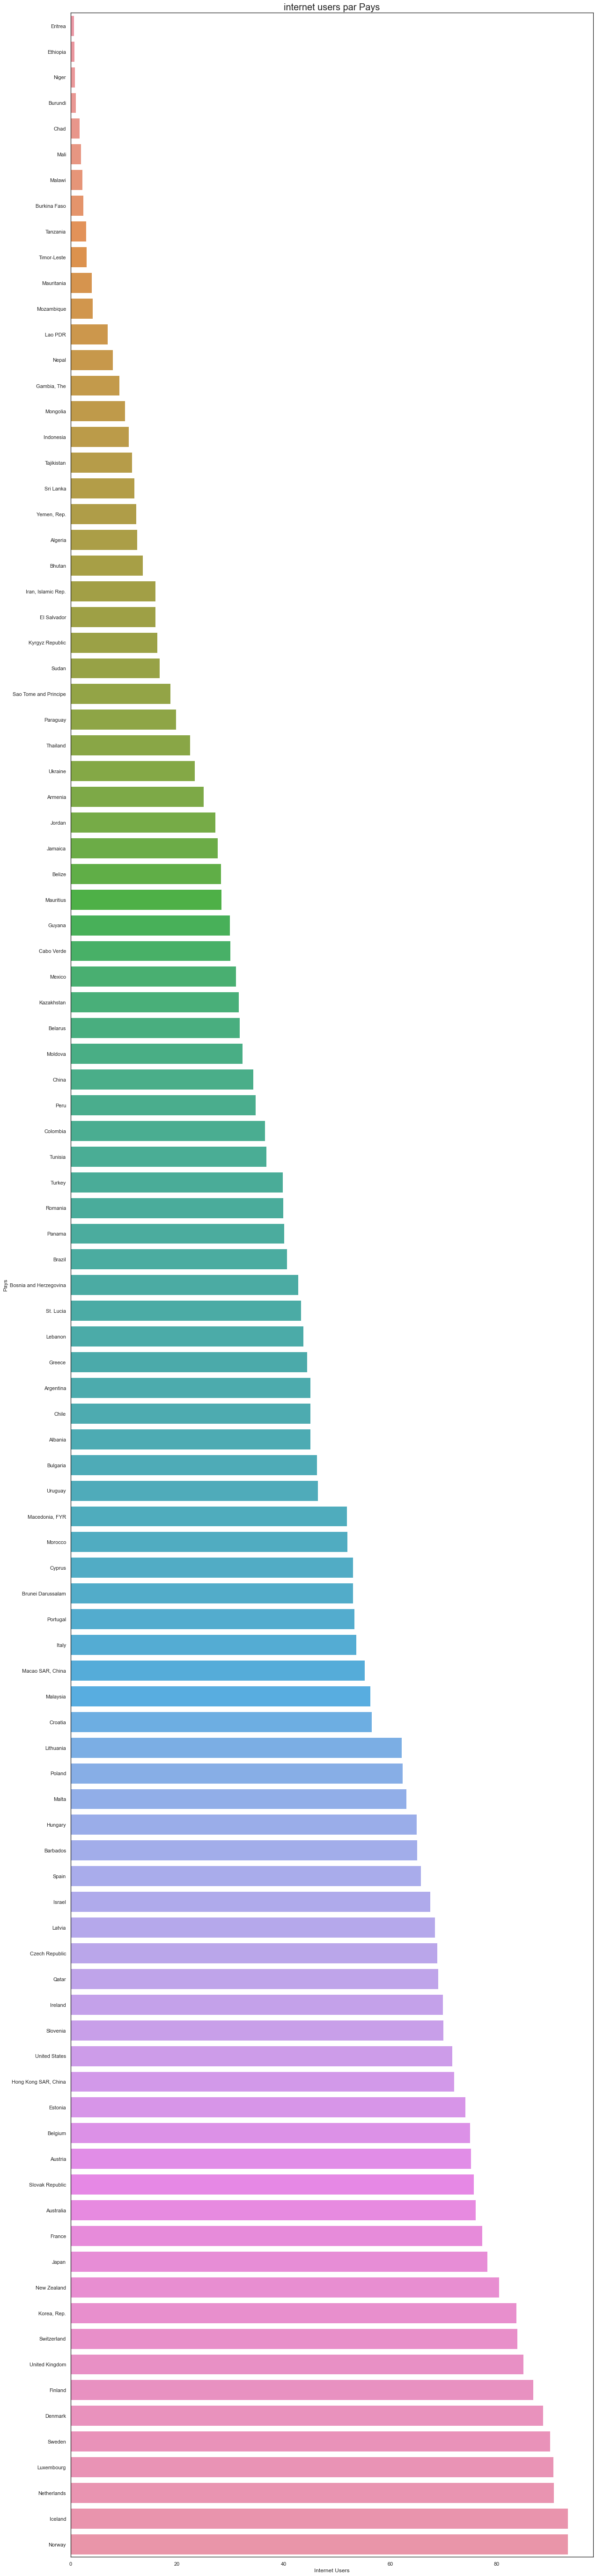

In [51]:
#internet users par Pays
sns.set(style="white")
plt.figure(figsize=(20,100))
sns.barplot(data=data_stat,x= data_stat['IT.NET.USER.P2'], y=data_stat['country_name'], order=data_stat.sort_values('IT.NET.USER.P2')['country_name'])
plt.title('internet users par Pays', size=20)
plt.xlabel('Internet Users')
plt.ylabel('Pays')
plt.show()

### Graphe 2 : Le nombre des étudiants par Pays 

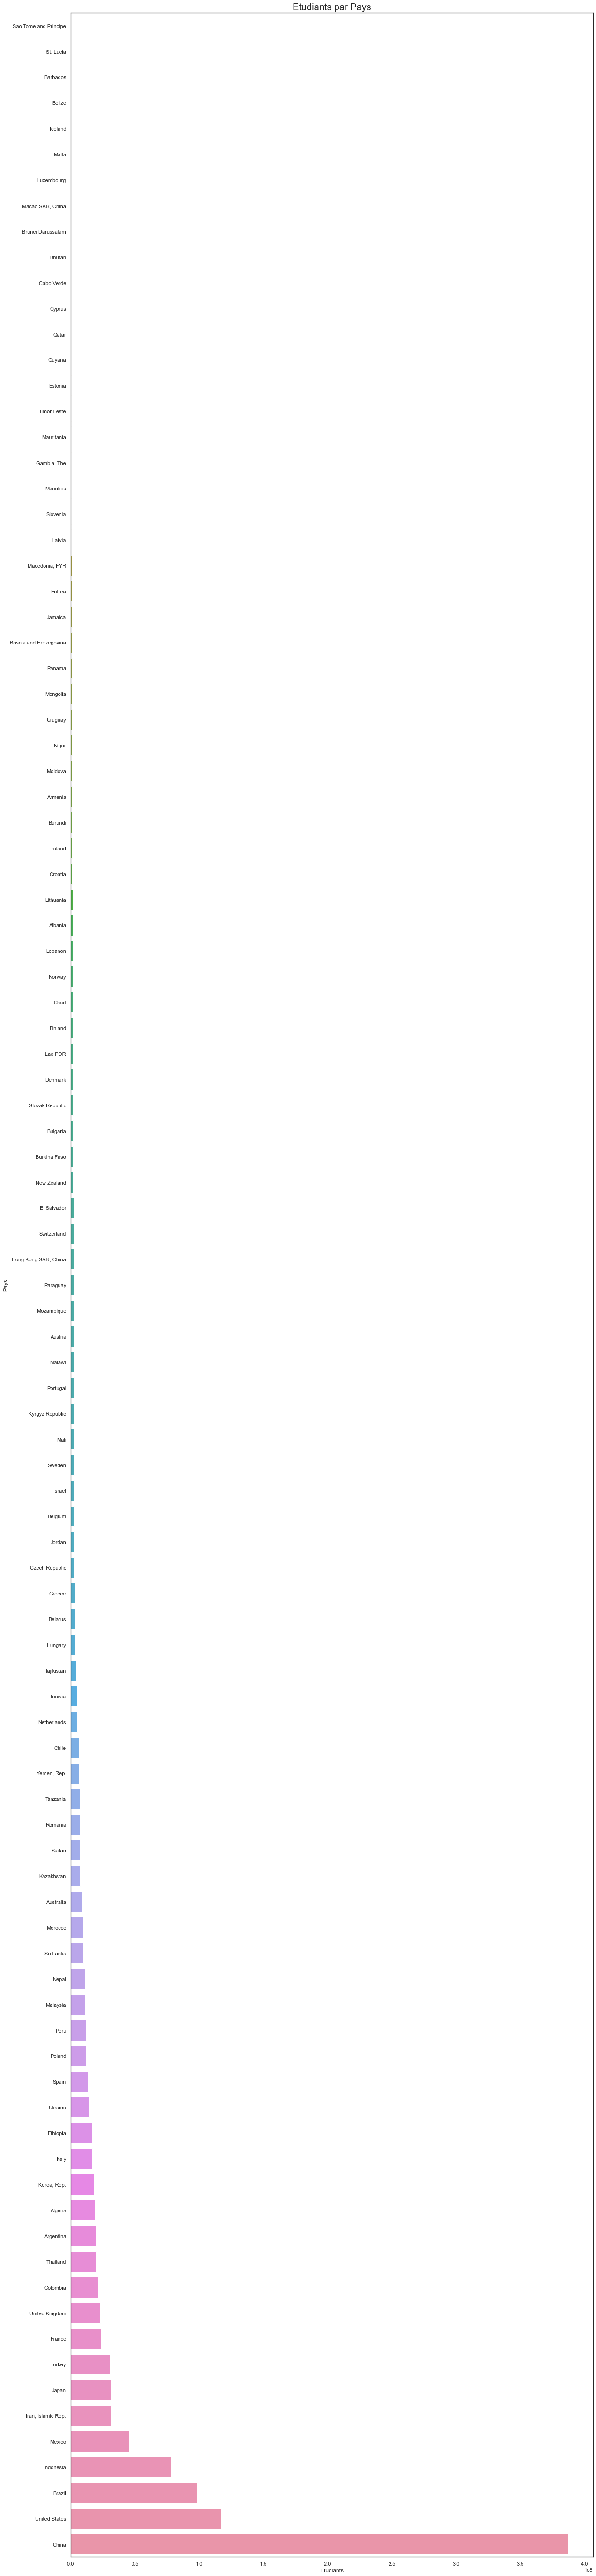

In [52]:
#Etudiants par Pays
sns.set(style="white")
plt.figure(figsize=(20,100))
data_stat['students']=data_stat['UIS.E.2.GPV'] + data_stat['UIS.E.2'] + data_stat['SE.SEC.ENRL.GC'] + data_stat['SE.SEC.ENRL'] + data_stat['UIS.E.3.GPV'] + data_stat['UIS.E.3'] + data_stat['SE.TER.ENRL']
sns.barplot(data=data_stat,x= data_stat['students'], y=data_stat['country_name'], order=data_stat.sort_values('students')['country_name'])
plt.title('Etudiants par Pays', size=20)
plt.xlabel('Etudiants')
plt.ylabel('Pays')
plt.show()

### Graphe 3 :  Population 15-24 par Pays

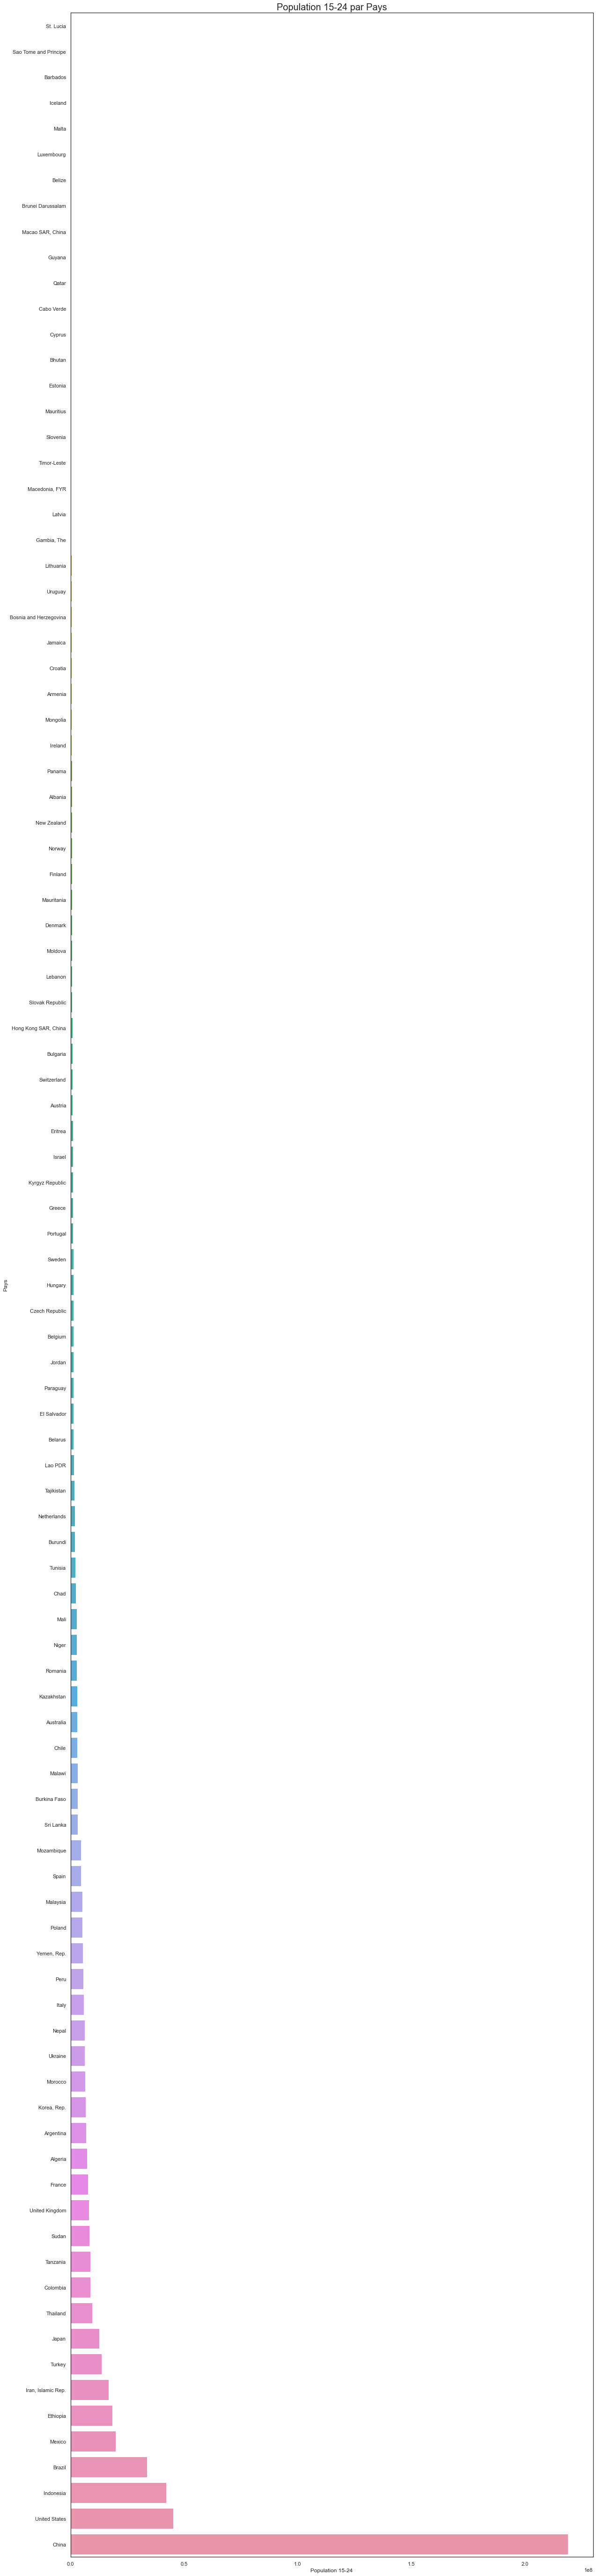

In [53]:
#Population 15-24 par Pays
sns.set(style="white")
plt.figure(figsize=(20,100))
sns.barplot(data=data_stat,x= data_stat['SP.POP.1524.TO.UN'], y=data_stat['country_name'], order=data_stat.sort_values('SP.POP.1524.TO.UN')['country_name'])
plt.title('Population 15-24 par Pays', size=20)
plt.xlabel('Population 15-24')
plt.ylabel('Pays')
plt.show()

### Graphe 4 : GDP per capita, PPP par Pays

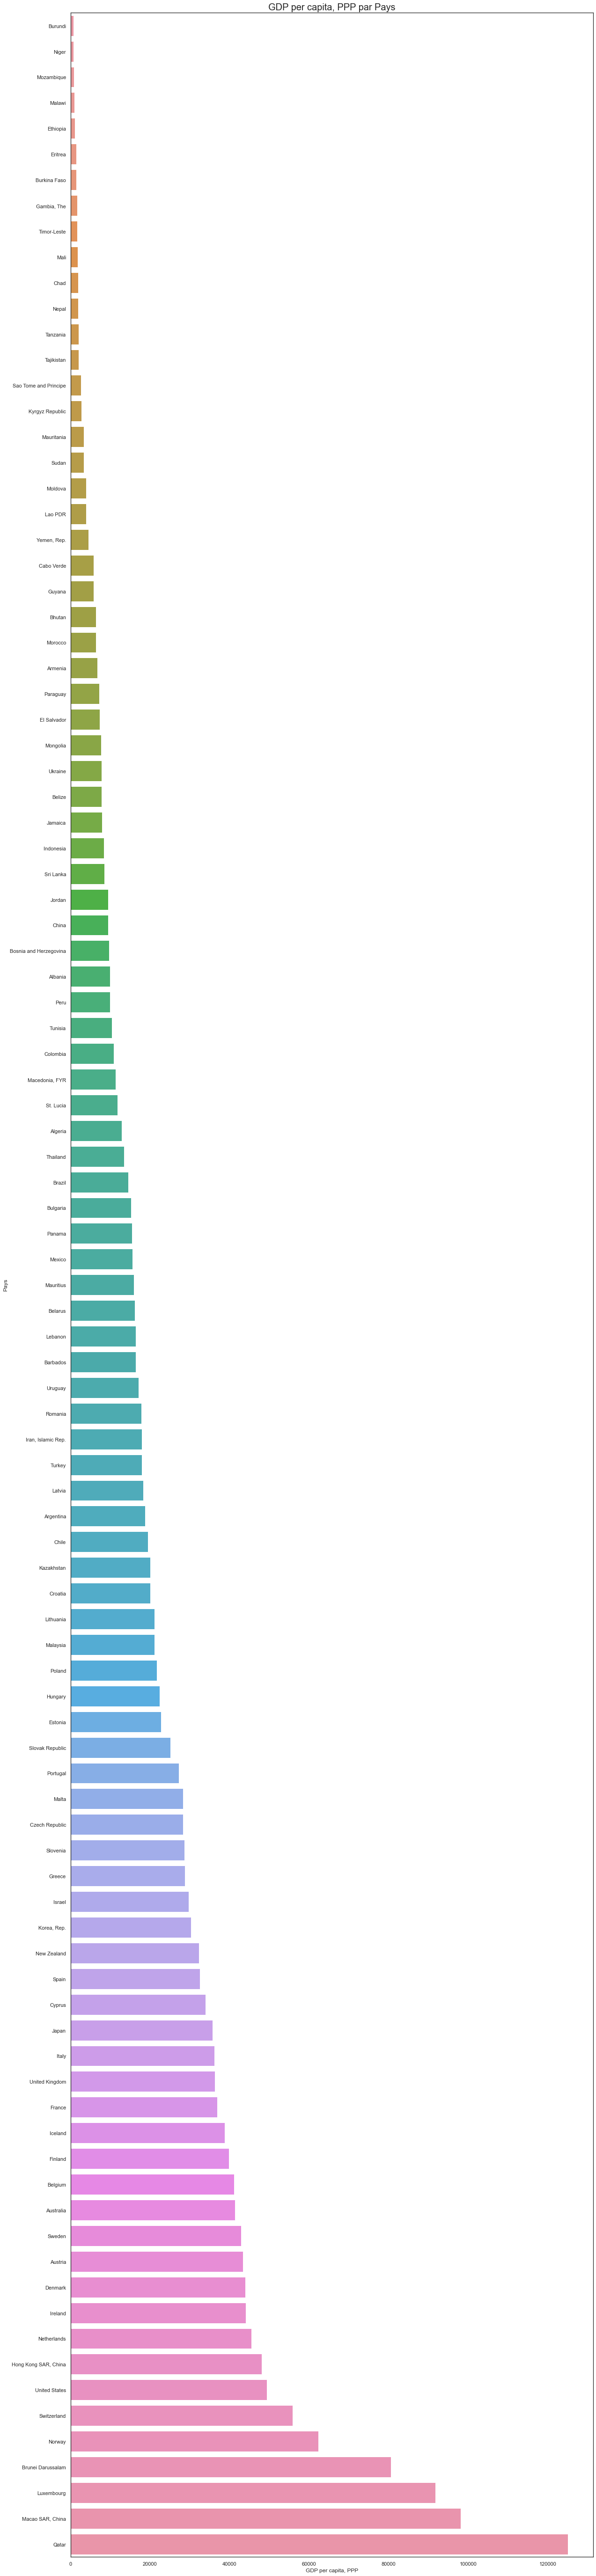

In [54]:
#GDP per capita, PPP par Pays
sns.set(style="white")
plt.figure(figsize=(20,100))
sns.barplot(data=data_stat,x= data_stat['NY.GDP.PCAP.PP.KD'], y=data_stat['country_name'], order=data_stat.sort_values('NY.GDP.PCAP.PP.KD')['country_name'])
plt.title('GDP per capita, PPP par Pays', size=20)
plt.xlabel('GDP per capita, PPP')
plt.ylabel('Pays')
plt.show()

### Graphe 5 : Nombre des clients potentiels par Pays

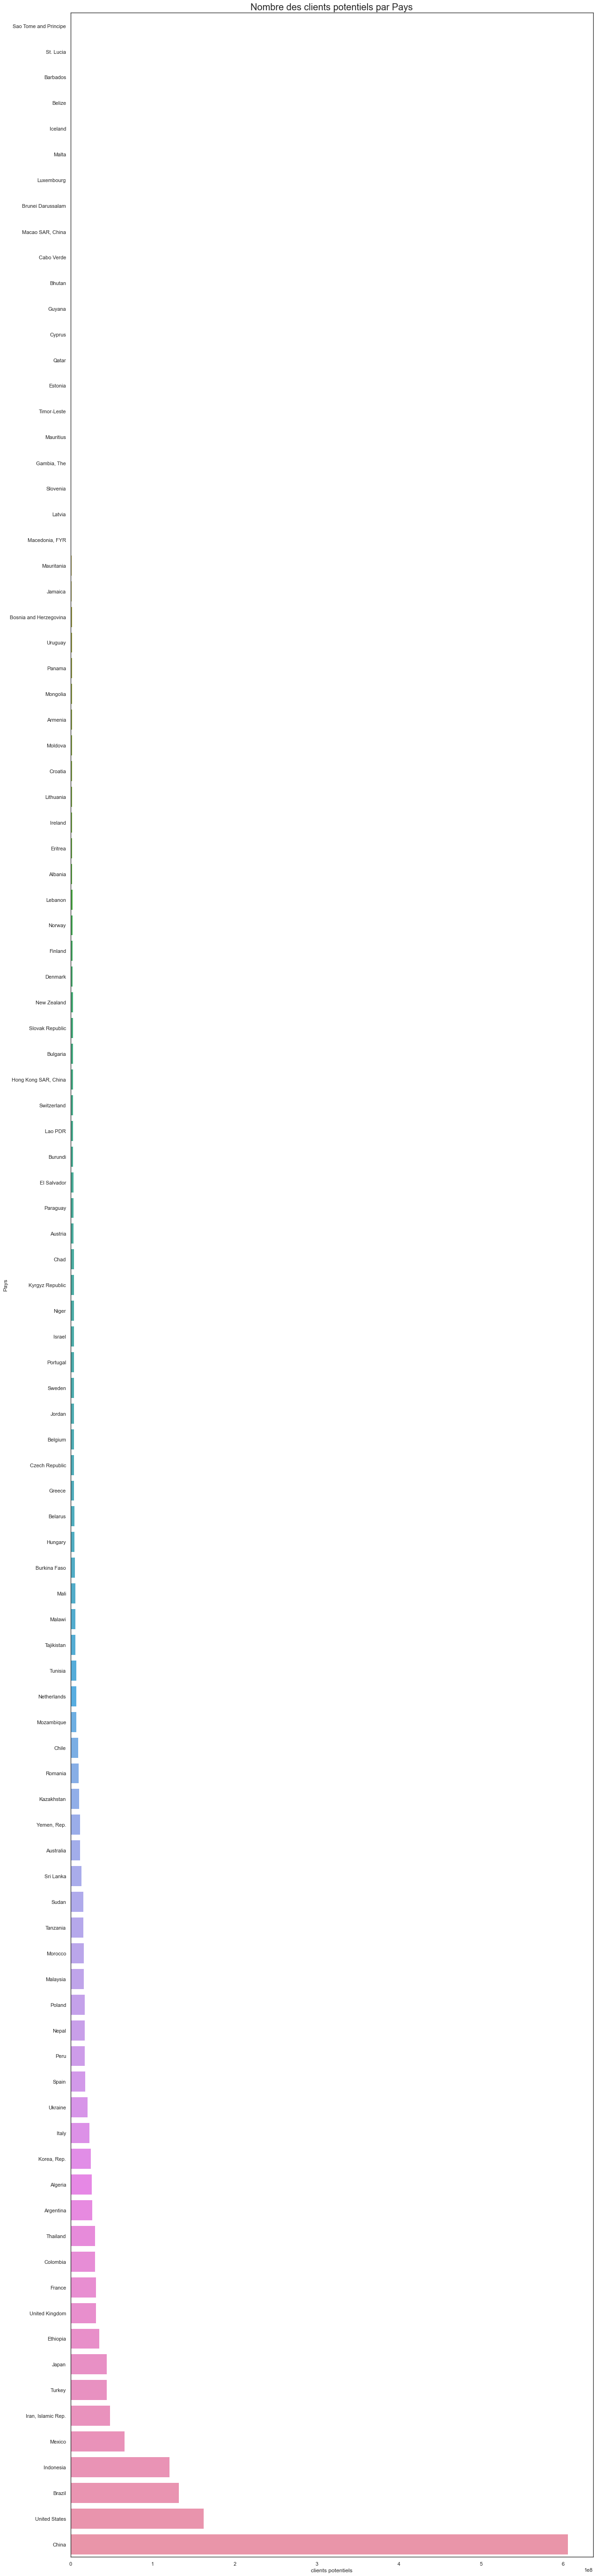

In [59]:
#Nombre des clients potentiels par Pays
sns.set(style="white")
plt.figure(figsize=(20,100))
data_stat['Clients_potentiels']=data_stat['UIS.E.2.GPV'] + data_stat['UIS.E.2'] + data_stat['SE.SEC.ENRL.GC'] + data_stat['SE.SEC.ENRL'] + data_stat['UIS.E.3.GPV'] + data_stat['UIS.E.3'] + data_stat['SE.TER.ENRL'] + data_stat['IT.NET.USER.P2'] + data_stat['NY.GDP.PCAP.PP.KD'] + data_stat['SP.POP.1524.TO.UN']
sns.barplot(data=data_stat,x= data_stat['Clients_potentiels'], y=data_stat['country_name'], order=data_stat.sort_values('Clients_potentiels')['country_name'])
plt.title('Nombre des clients potentiels par Pays', size=20)
plt.xlabel('clients potentiels')
plt.ylabel('Pays')
plt.show()

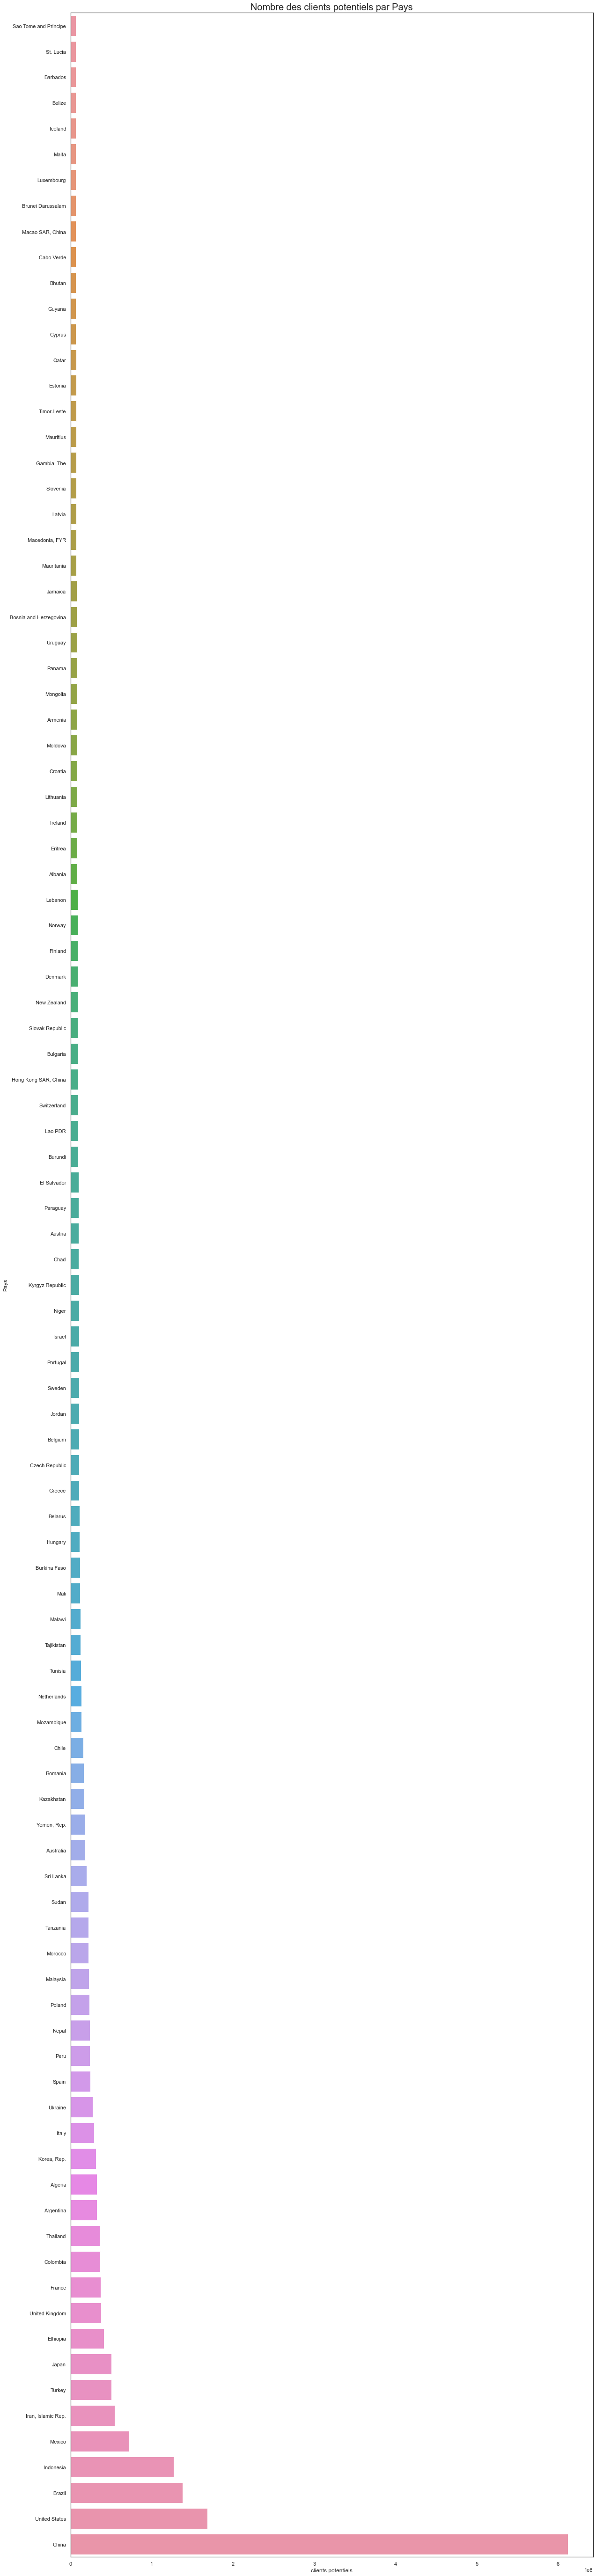

In [75]:
#Nombre des clients potentiels par Pays
sns.set(style="white")
plt.figure(figsize=(20,100))
data_stat['Clients_potentiels']=data_stat['IT.NET.USER.P2'] + data_stat['NY.GDP.PCAP.PP.KD'] + data_stat['SP.POP.1524.TO.UN'] + data_stat['UIS.E.2.GPV'] + data_stat['UIS.E.2'] + data_stat['SE.SEC.ENRL.GC'] + data_stat['SE.SEC.ENRL'] + data_stat['UIS.E.3.GPV'] + data_stat['UIS.E.3'] + data_stat['SE.TER.ENRL']
data_stat['mean']=data_stat['IT.NET.USER.P2'] + data_stat['NY.GDP.PCAP.PP.KD'] + data_stat['SP.POP.1524.TO.UN'].mean()
sns.barplot(data=data_stat,x= data_stat['Clients_potentiels']+data_stat['mean'], y=data_stat['country_name'], order=data_stat.sort_values('Clients_potentiels')['country_name'])
plt.title('Nombre des clients potentiels par Pays', size=20)
plt.xlabel('clients potentiels')
plt.ylabel('Pays')
plt.show()

# 4. Conclusion

En se basant sur cette analyse exploratoire du dataset fourni. Le jeu de données semble étre pertinent pour répondre à la problématique de l'expansion à l'international.
Ainsi, l'analyse conduit à indiquer que les pays à cibler en priorité sont dans l'ordre: 

- Chine
- Etats Unis
- Brésil
- Indonesie

Ce dataset comporte pas mal d'informations sur tous les pays du monde. Cependant, il ya aussi beaucoup des données NaN ce qui rends la prise des décisions difficiles.